## GEORGIOS KOUTROUMPIS, AEM 9668
### ECE AUTh, 2022
### Computational Intelligence
#### Project 3, MLP

In [ ]:
# Imports
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt
from time import time
from google.colab import files



In [ ]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Reshape data into 1D arrays

num_of_features = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_of_features)
X_test = X_test.reshape(X_test.shape[0], num_of_features)

In [ ]:
# Scale data value to [0,1]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

n_train = X_train.shape[0]
input_shape = (num_of_features,)

In [ ]:
# Convert classes to one-hot encoding (categorical)

num_of_classes = 10

Y_train = to_categorical(Y_train, num_of_classes)
Y_test = to_categorical(Y_test, num_of_classes)

In [ ]:
# Plots the accuracy and loss graphs of a model
# @args:
# history => The training history of a model
# name => A name to be used when saving the graph
def plot_accuracy_loss(history, name="model"):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  
  fig_name = f"Accuracy_{name}.png"

  plt.savefig(fig_name)
  files.download(fig_name)    

  plt.show()
  
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')

  
  fig_name_1 = f"Loss_{name}.png"
  plt.savefig(fig_name_1)
  files.download(fig_name_1) 
  
  plt.show()

In [ ]:
# Builds and fits a model using most of Keras' default parameters
# @args:
# X_train => The training data inputs
# Y_grain => The training data outputs
# input_shape => The input shape
# num_of_classes => The number of classes in the y (multiclass classification)
# batch_size => The batch size to be used during trainig
# epochs => The number of epochs to train the model for
# validation_split => The split of the training data to use as validation
# regularize => Defaults to None. Use "l1" or "l2", to add L1 or L2 reg
# a => The regularization parameter
# droput => Defaults to None. Use a float to add dropout and set its probability

def build_model_default(X_train, Y_train, input_shape, num_of_classes,\
                        batch_size=256, epochs=100, validation_split=0.2,\
                        regularizer=None, a=0, dropout=False):
  model = Sequential()
  model.add(Dense(128, input_shape=input_shape, activation="relu"))

  # If dropout is set to a number, add dropout to each layer
  if dropout:
    model.add(Dropout(0.3))
  model.add(Dense(256, activation="relu"))
  if dropout:
    model.add(Dropout(0.3))
  model.add(Dense(num_of_classes, activation="softmax"))

  # If regularizer is not None, add the respectie regularization
  if regularizer == "l1":
    model.layers[0].kernel_regularizer = regularizers.L1(l1=a)
    model.layers[1].kernel_regularizer = regularizers.L1(l1=a)
    model.layers[2].kernel_regularizer = regularizers.L1(l1=a)
  elif regularizer == "l2":
    model.layers[0].kernel_regularizer = regularizers.L2(l2=a)
    model.layers[1].kernel_regularizer = regularizers.L2(l2=a)
    model.layers[2].kernel_regularizer = regularizers.L2(l2=a)

  # Compile the montel with categorical crossentropy as the loss
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

  # Get the time that the model needs to be trained
  start = time()
  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,\
            validation_split=0.2, verbose=1)
  print("Training time: %.2fs, batch size: %d" % (time()-start, batch_size))

  # Return the model and the training history
  return model, history

In [ ]:
# Builds and fits a model using a given optimizer
# @args:
# X_train => The training data inputs
# Y_grain => The training data outputs
# input_shape => The input shape
# num_of_classes => The number of classes in the y (multiclass classification)
# optimizer => The optimizer to use
# batch_size => The batch size to be used during trainig
# epochs => The number of epochs to train the model for
# validation_split => The split of the training data to use as validation
# regularize => Defaults to None. Use "l1" or "l2", to add L1 or L2 reg
# a => The regularization parameter

def build_model_optimizer(X_train, Y_train, input_shape,\
                          num_of_classes, optimizer, batch_size=256,\
                          epochs=100, validation_split=0.2,\
                          regularizer=None, a=0):
  model = Sequential()
  model.add(Dense(128, input_shape=input_shape, activation="relu"))
  model.add(Dense(256, activation="relu"))
  model.add(Dense(num_of_classes, activation="softmax"))

  # If regularizer is not None, add the respectie regularization
  if regularizer == "l1":
    model.layers[0].kernel_regularizer = regularizers.L1(l1=a)
    model.layers[1].kernel_regularizer = regularizers.L1(l1=a)
    model.layers[2].kernel_regularizer = regularizers.L1(l1=a)
  elif regularizer == "l2":
    model.layers[0].kernel_regularizer = regularizers.L2(l2=a)
    model.layers[1].kernel_regularizer = regularizers.L2(l2=a)
    model.layers[2].kernel_regularizer = regularizers.L2(l2=a)

  # Compile the montel with categorical crossentropy as the loss
  model.compile(loss='categorical_crossentropy', optimizer=optimizer,\
                metrics=['accuracy'])
  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,\
            validation_split=0.2)
  
  # Return the model and the training history
  return model, history


# Builds and fits a model using a SGD and initialization of weights using the
# normal distribution with mean=10
# @args:
# X_train => The training data inputs
# Y_grain => The training data outputs
# input_shape => The input shape
# num_of_classes => The number of classes in the y (multiclass classification)
# batch_size => The batch size to be used during trainig
# epochs => The number of epochs to train the model for
# validation_split => The split of the training data to use as validation
# regularize => Defaults to None. Use "l1" or "l2", to add L1 or L2 reg
# a => The regularization parameter
def build_model_SGD(X_train, Y_train, input_shape,\
                    num_of_classes, batch_size=256,\
                    epochs=100, validation_split=0.2,\
                    regularizer=None, a=0):
  model = Sequential()

  model.add(Dense(128, kernel_initializer=initializers.RandomNormal(mean=10),\
                  input_shape=input_shape, activation="relu"))
  model.add(Dense(256, kernel_initializer=initializers.RandomNormal(mean=10),\
                  activation="relu"))
  model.add(Dense(num_of_classes, \
                  kernel_initializer=initializers.RandomNormal(mean=10),\
                  activation="softmax"))

  if regularizer == "l1":
    model.layers[0].kernel_regularizer = regularizers.L1(l1=a)
    model.layers[1].kernel_regularizer = regularizers.L1(l1=a)
    model.layers[2].kernel_regularizer = regularizers.L1(l1=a)
  elif regularizer == "l2":
    model.layers[0].kernel_regularizer = regularizers.L2(l2=a)
    model.layers[1].kernel_regularizer = regularizers.L2(l2=a)
    model.layers[2].kernel_regularizer = regularizers.L2(l2=a)

  optimizer = tensorflow.keras.optimizers.SGD(learning_rate=0.01)

  model.compile(loss='categorical_crossentropy', optimizer=optimizer,\
                metrics=['accuracy'])
  history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,\
            validation_split=0.2)
  
  return model, history

Epoch 1/100
48000/48000 [==============================] - 143s 3ms/step - loss: 0.5386 - accuracy: 0.9210 - val_loss: 0.6464 - val_accuracy: 0.9368
Epoch 2/100
48000/48000 [==============================] - 138s 3ms/step - loss: 0.5444 - accuracy: 0.9515 - val_loss: 0.5870 - val_accuracy: 0.9608
Epoch 3/100
48000/48000 [==============================] - 139s 3ms/step - loss: 0.5275 - accuracy: 0.9607 - val_loss: 0.6079 - val_accuracy: 0.9602
Epoch 4/100
48000/48000 [==============================] - 141s 3ms/step - loss: 0.5015 - accuracy: 0.9665 - val_loss: 0.6198 - val_accuracy: 0.9591
Epoch 5/100
48000/48000 [==============================] - 140s 3ms/step - loss: 0.4652 - accuracy: 0.9703 - val_loss: 0.7471 - val_accuracy: 0.9581
Epoch 6/100
48000/48000 [==============================] - 135s 3ms/step - loss: 0.4500 - accuracy: 0.9724 - val_loss: 0.7059 - val_accuracy: 0.9690
Epoch 7/100
48000/48000 [==============================] - 134s 3ms/step - loss: 0.4439 - accuracy: 0.9753

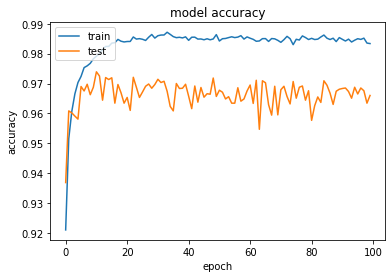

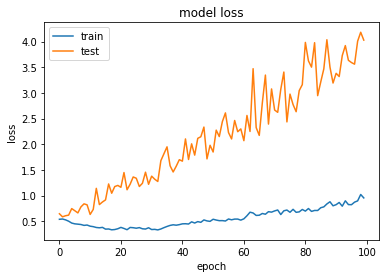

313/313 [==============================] - 1s 3ms/step - loss: 3.9414 - accuracy: 0.9664
Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3939 - accuracy: 0.8874 - val_loss: 0.2176 - val_accuracy: 0.9344
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1699 - accuracy: 0.9497 - val_loss: 0.1495 - val_accuracy: 0.9563
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1147 - accuracy: 0.9647 - val_loss: 0.1390 - val_accuracy: 0.9582
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0866 - accuracy: 0.9743 - val_loss: 0.1030 - val_accuracy: 0.9695
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0668 - accuracy: 0.9796 - val_loss: 0.1145 - val_accuracy: 0.9650
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0539 - accuracy: 0.9844 - val_loss: 0.1141 - val_accuracy: 0.9677
Epoch 7/100
188/188 [==============================] 

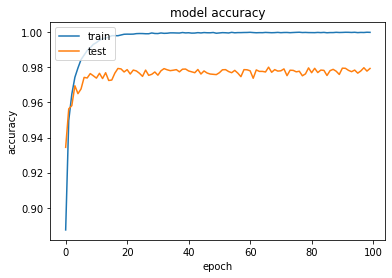

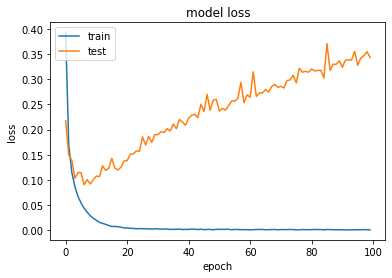

313/313 [==============================] - 1s 2ms/step - loss: 0.3013 - accuracy: 0.9784
Epoch 1/100
1/1 [==============================] - 1s 885ms/step - loss: 2.3682 - accuracy: 0.0704 - val_loss: 2.0726 - val_accuracy: 0.5663
Epoch 2/100
1/1 [==============================] - 0s 133ms/step - loss: 2.0752 - accuracy: 0.5514 - val_loss: 1.7755 - val_accuracy: 0.7089
Epoch 3/100
1/1 [==============================] - 0s 141ms/step - loss: 1.7828 - accuracy: 0.6924 - val_loss: 1.4419 - val_accuracy: 0.7779
Epoch 4/100
1/1 [==============================] - 0s 119ms/step - loss: 1.4560 - accuracy: 0.7651 - val_loss: 1.1771 - val_accuracy: 0.7603
Epoch 5/100
1/1 [==============================] - 0s 119ms/step - loss: 1.1970 - accuracy: 0.7446 - val_loss: 1.1218 - val_accuracy: 0.6826
Epoch 6/100
1/1 [==============================] - 0s 123ms/step - loss: 1.1509 - accuracy: 0.6703 - val_loss: 1.0435 - val_accuracy: 0.7051
Epoch 7/100
1/1 [==============================] - 0s 119ms/step 

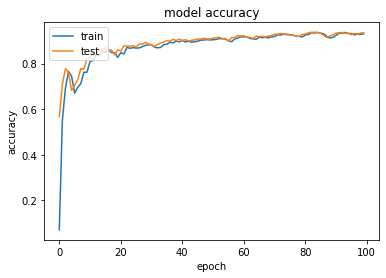

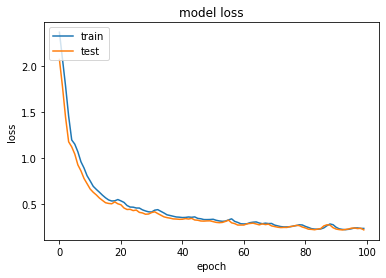

313/313 [==============================] - 1s 2ms/step - loss: 0.2247 - accuracy: 0.9329


In [ ]:
# Train and test the first batch of models, using online, mini-batch 
# and full batch
 
batch_sizes = [1, 256, n_train]


for batch_size in batch_sizes:
  model, history = build_model_default(X_train, Y_train, input_shape, num_of_classes,\
                      batch_size=batch_size)
  name = f"{batch_size}_default"
  plot_accuracy_loss(history, name)



  

Epoch 1/100
188/188 [==============================] - 5s 5ms/step - loss: 0.4580 - accuracy: 0.8729 - val_loss: 0.2218 - val_accuracy: 0.9350
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1953 - accuracy: 0.9417 - val_loss: 0.1716 - val_accuracy: 0.9484
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1402 - accuracy: 0.9586 - val_loss: 0.1359 - val_accuracy: 0.9617
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1119 - accuracy: 0.9667 - val_loss: 0.1366 - val_accuracy: 0.9612
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0948 - accuracy: 0.9726 - val_loss: 0.1102 - val_accuracy: 0.9692
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0793 - accuracy: 0.9781 - val_loss: 0.1594 - val_accuracy: 0.9586
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9797 - val_loss: 0.1192 - val_accuracy: 0.9696

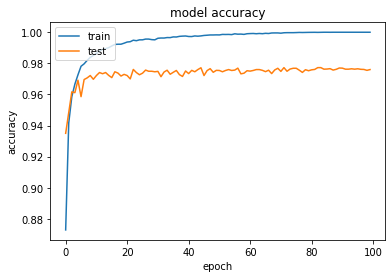

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

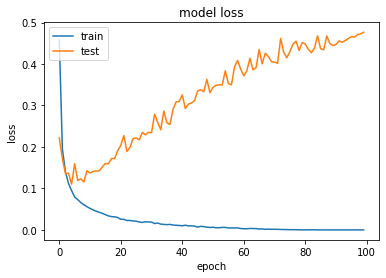

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3290 - accuracy: 0.8987 - val_loss: 0.1617 - val_accuracy: 0.9528
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1346 - accuracy: 0.9603 - val_loss: 0.1309 - val_accuracy: 0.9600
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0944 - accuracy: 0.9712 - val_loss: 0.1325 - val_accuracy: 0.9595
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.0978 - val_accuracy: 0.9701
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0559 - accuracy: 0.9828 - val_loss: 0.0869 - val_accuracy: 0.9733
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0861 - val_accuracy: 0.9759
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0875 - val_accuracy: 0.9749

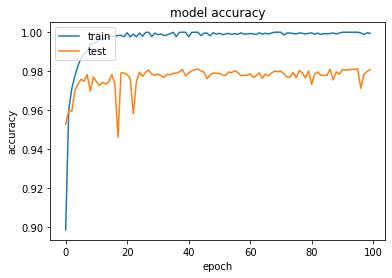

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

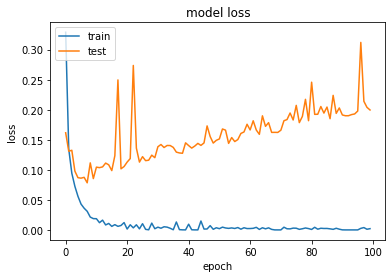

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Train and test the models that use the RMSProp Optimizer

rho_values = [0.01, 0.99]
lr = 0.001

for rho in rho_values:
  opt = tensorflow.keras.optimizers.RMSprop(learning_rate=lr, rho=rho)
  model, history = build_model_optimizer(X_train, Y_train, input_shape, num_of_classes,\
                      opt)
  name = f"rmsprop_rho_{rho}"
  plot_accuracy_loss(history, name)

Epoch 1/100
188/188 [==============================] - 1s 6ms/step - loss: 3967509504.0000 - accuracy: 0.1134 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3018 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accurac

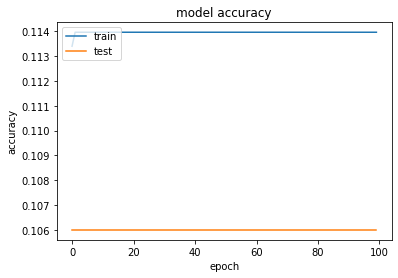

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

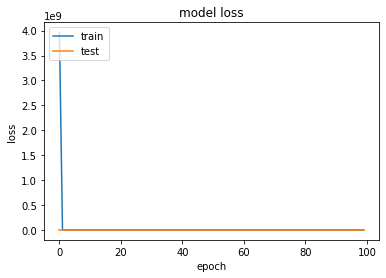

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
# Train and test the model using the SGD Optimizer and initialization

model, history = build_model_SGD(X_train, Y_train, input_shape, num_of_classes)
name = "sgd"
plot_accuracy_loss(history, name)

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3988 - accuracy: 0.8850 - val_loss: 0.2123 - val_accuracy: 0.9383
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1689 - accuracy: 0.9504 - val_loss: 0.1547 - val_accuracy: 0.9499
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1153 - accuracy: 0.9649 - val_loss: 0.1240 - val_accuracy: 0.9606
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0868 - accuracy: 0.9734 - val_loss: 0.0953 - val_accuracy: 0.9719
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0672 - accuracy: 0.9797 - val_loss: 0.0932 - val_accuracy: 0.9727
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0536 - accuracy: 0.9839 - val_loss: 0.0925 - val_accuracy: 0.9728
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.1146 - val_accuracy: 0.9663

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

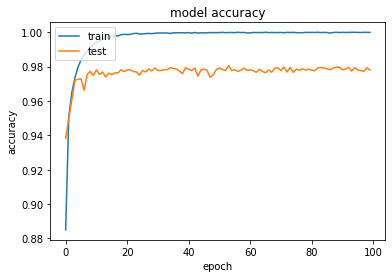

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

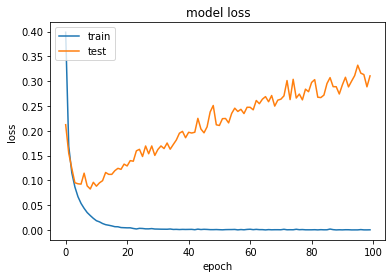

Epoch 1/100
1/1 [==============================] - 1s 779ms/step - loss: 2.3196 - accuracy: 0.0851 - val_loss: 2.0105 - val_accuracy: 0.4322
Epoch 2/100
1/1 [==============================] - 0s 114ms/step - loss: 2.0214 - accuracy: 0.4243 - val_loss: 1.7288 - val_accuracy: 0.6550
Epoch 3/100
1/1 [==============================] - 0s 122ms/step - loss: 1.7462 - accuracy: 0.6352 - val_loss: 1.4937 - val_accuracy: 0.6784
Epoch 4/100
1/1 [==============================] - 0s 118ms/step - loss: 1.5146 - accuracy: 0.6520 - val_loss: 1.3769 - val_accuracy: 0.6157
Epoch 5/100
1/1 [==============================] - 0s 132ms/step - loss: 1.4072 - accuracy: 0.5999 - val_loss: 1.2501 - val_accuracy: 0.6902
Epoch 6/100
1/1 [==============================] - 0s 123ms/step - loss: 1.2760 - accuracy: 0.6690 - val_loss: 1.0488 - val_accuracy: 0.7475
Epoch 7/100
1/1 [==============================] - 0s 120ms/step - loss: 1.0818 - accuracy: 0.7291 - val_loss: 0.9320 - val_accuracy: 0.8023
Epoch 8/100
1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

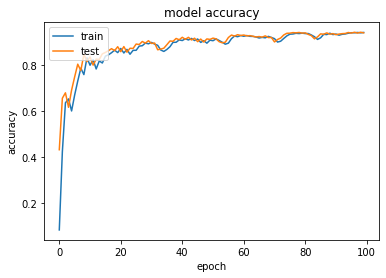

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

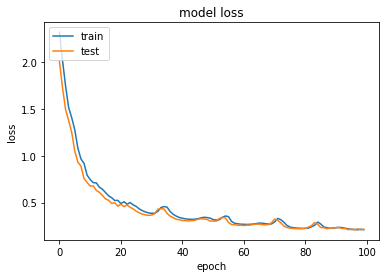

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4694 - accuracy: 0.8688 - val_loss: 0.2139 - val_accuracy: 0.9384
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1936 - accuracy: 0.9423 - val_loss: 0.1526 - val_accuracy: 0.9563
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1396 - accuracy: 0.9586 - val_loss: 0.1402 - val_accuracy: 0.9588
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1119 - accuracy: 0.9668 - val_loss: 0.1293 - val_accuracy: 0.9614
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0965 - accuracy: 0.9722 - val_loss: 0.1221 - val_accuracy: 0.9650
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0840 - accuracy: 0.9766 - val_loss: 0.1240 - val_accuracy: 0.9668
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0736 - accuracy: 0.9796 - val_loss: 0.1312 - val_accuracy: 0.9692

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

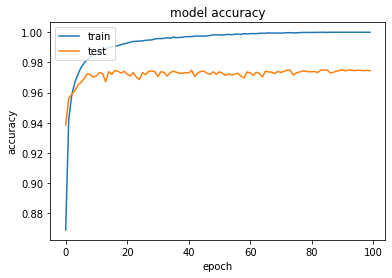

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

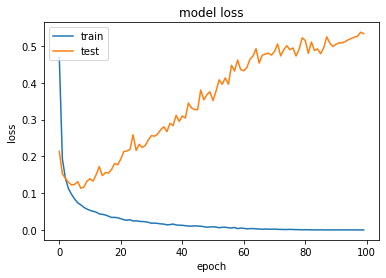

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3214 - accuracy: 0.9023 - val_loss: 0.1642 - val_accuracy: 0.9540
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1375 - accuracy: 0.9580 - val_loss: 0.1275 - val_accuracy: 0.9611
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0972 - accuracy: 0.9710 - val_loss: 0.1029 - val_accuracy: 0.9685
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.1079 - val_accuracy: 0.9669
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0922 - val_accuracy: 0.9717
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0919 - val_accuracy: 0.9713
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0375 - accuracy: 0.9888 - val_loss: 0.1078 - val_accuracy: 0.9676

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

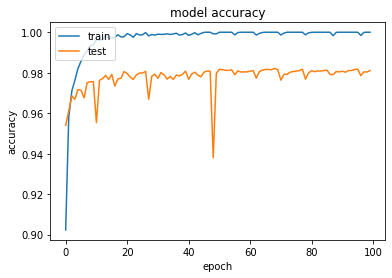

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

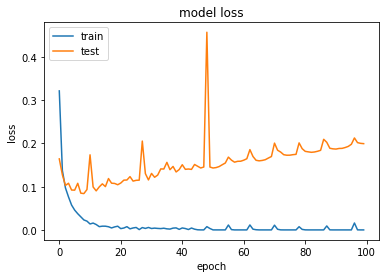

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 3111236864.0000 - accuracy: 0.1135 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3019 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accurac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

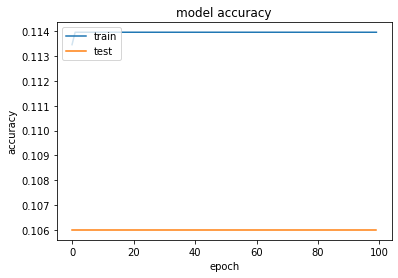

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

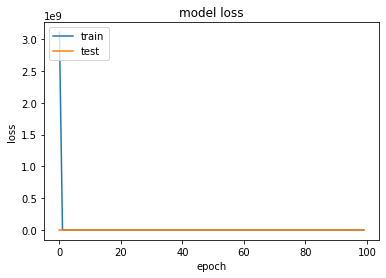

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3983 - accuracy: 0.8851 - val_loss: 0.2172 - val_accuracy: 0.9332
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1695 - accuracy: 0.9491 - val_loss: 0.1344 - val_accuracy: 0.9595
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1168 - accuracy: 0.9644 - val_loss: 0.1265 - val_accuracy: 0.9612
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0860 - accuracy: 0.9740 - val_loss: 0.1133 - val_accuracy: 0.9657
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.0992 - val_accuracy: 0.9690
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.1079 - val_accuracy: 0.9701
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.1084 - val_accuracy: 0.9696

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

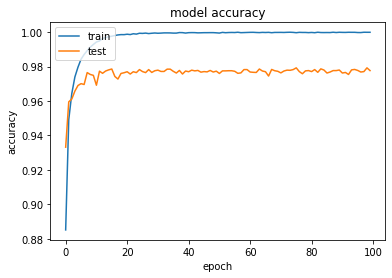

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

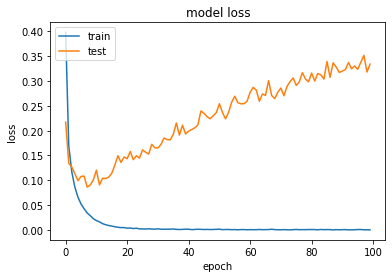

Epoch 1/100
1/1 [==============================] - 1s 767ms/step - loss: 2.3429 - accuracy: 0.0610 - val_loss: 2.0069 - val_accuracy: 0.5788
Epoch 2/100
1/1 [==============================] - 0s 123ms/step - loss: 2.0137 - accuracy: 0.5639 - val_loss: 1.6936 - val_accuracy: 0.6731
Epoch 3/100
1/1 [==============================] - 0s 130ms/step - loss: 1.7077 - accuracy: 0.6520 - val_loss: 1.4135 - val_accuracy: 0.7393
Epoch 4/100
1/1 [==============================] - 0s 133ms/step - loss: 1.4369 - accuracy: 0.7181 - val_loss: 1.2928 - val_accuracy: 0.6306
Epoch 5/100
1/1 [==============================] - 0s 116ms/step - loss: 1.3201 - accuracy: 0.6161 - val_loss: 1.2045 - val_accuracy: 0.6826
Epoch 6/100
1/1 [==============================] - 0s 140ms/step - loss: 1.2379 - accuracy: 0.6613 - val_loss: 1.0109 - val_accuracy: 0.7444
Epoch 7/100
1/1 [==============================] - 0s 126ms/step - loss: 1.0439 - accuracy: 0.7260 - val_loss: 0.9204 - val_accuracy: 0.7716
Epoch 8/100
1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

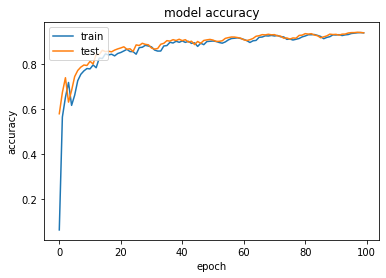

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

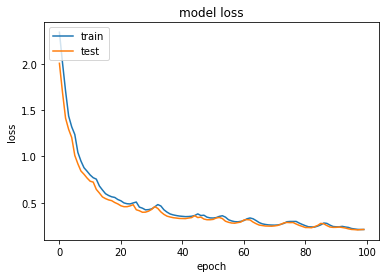

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4621 - accuracy: 0.8727 - val_loss: 0.2239 - val_accuracy: 0.9352
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1907 - accuracy: 0.9442 - val_loss: 0.1572 - val_accuracy: 0.9556
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1392 - accuracy: 0.9590 - val_loss: 0.1393 - val_accuracy: 0.9609
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1118 - accuracy: 0.9671 - val_loss: 0.1296 - val_accuracy: 0.9639
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0940 - accuracy: 0.9722 - val_loss: 0.1175 - val_accuracy: 0.9674
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0833 - accuracy: 0.9761 - val_loss: 0.1213 - val_accuracy: 0.9687
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0725 - accuracy: 0.9796 - val_loss: 0.1368 - val_accuracy: 0.9687

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

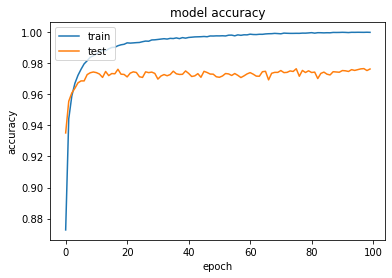

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

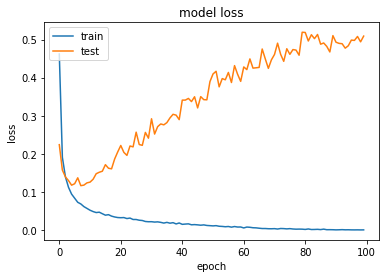

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3292 - accuracy: 0.8982 - val_loss: 0.1653 - val_accuracy: 0.9513
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1340 - accuracy: 0.9593 - val_loss: 0.1366 - val_accuracy: 0.9597
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0946 - accuracy: 0.9714 - val_loss: 0.1311 - val_accuracy: 0.9591
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.9787 - val_loss: 0.1277 - val_accuracy: 0.9603
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 0.1438 - val_accuracy: 0.9565
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0428 - accuracy: 0.9872 - val_loss: 0.1174 - val_accuracy: 0.9656
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0843 - val_accuracy: 0.9755

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

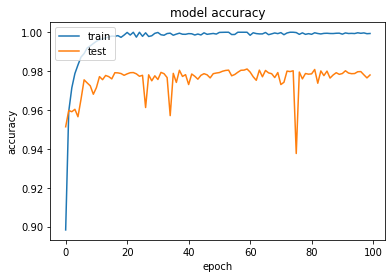

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

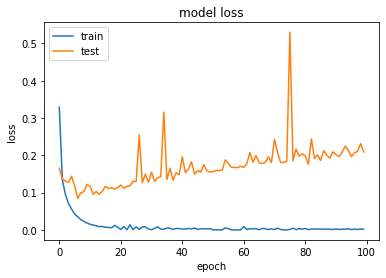

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 3802609152.0000 - accuracy: 0.1136 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3019 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accurac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

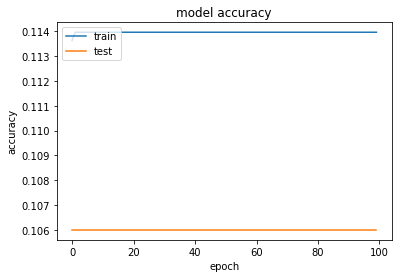

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

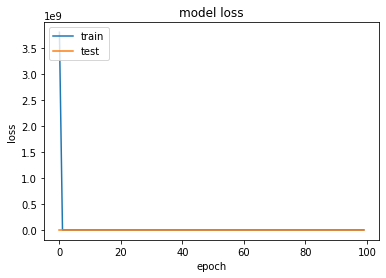

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.3946 - accuracy: 0.8859 - val_loss: 0.2136 - val_accuracy: 0.9339
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1694 - accuracy: 0.9495 - val_loss: 0.1405 - val_accuracy: 0.9578
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1153 - accuracy: 0.9655 - val_loss: 0.1185 - val_accuracy: 0.9657
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0876 - accuracy: 0.9739 - val_loss: 0.1282 - val_accuracy: 0.9605
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.1058 - val_accuracy: 0.9712
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.1041 - val_accuracy: 0.9714
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.1002 - val_accuracy: 0.9719

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

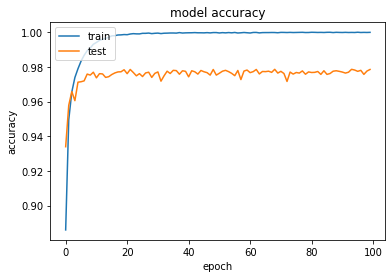

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

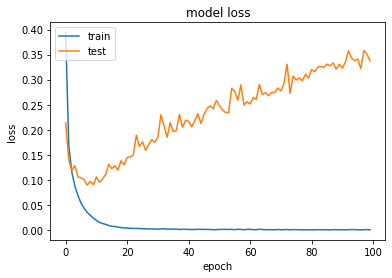

Epoch 1/100
1/1 [==============================] - 1s 805ms/step - loss: 2.3890 - accuracy: 0.0720 - val_loss: 2.0598 - val_accuracy: 0.4582
Epoch 2/100
1/1 [==============================] - 0s 144ms/step - loss: 2.0691 - accuracy: 0.4342 - val_loss: 1.7609 - val_accuracy: 0.7094
Epoch 3/100
1/1 [==============================] - 0s 138ms/step - loss: 1.7751 - accuracy: 0.6847 - val_loss: 1.4634 - val_accuracy: 0.7377
Epoch 4/100
1/1 [==============================] - 0s 126ms/step - loss: 1.4854 - accuracy: 0.7143 - val_loss: 1.3460 - val_accuracy: 0.6587
Epoch 5/100
1/1 [==============================] - 0s 129ms/step - loss: 1.3742 - accuracy: 0.6424 - val_loss: 1.2527 - val_accuracy: 0.7048
Epoch 6/100
1/1 [==============================] - 0s 145ms/step - loss: 1.2797 - accuracy: 0.6852 - val_loss: 1.0004 - val_accuracy: 0.7793
Epoch 7/100
1/1 [==============================] - 0s 145ms/step - loss: 1.0307 - accuracy: 0.7590 - val_loss: 0.8999 - val_accuracy: 0.8034
Epoch 8/100
1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

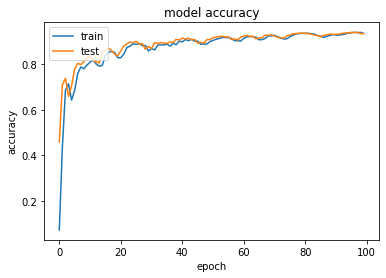

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

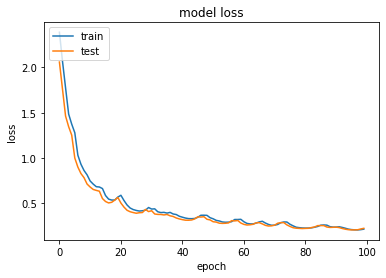

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.4646 - accuracy: 0.8705 - val_loss: 0.2397 - val_accuracy: 0.9289
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1904 - accuracy: 0.9430 - val_loss: 0.1666 - val_accuracy: 0.9523
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1352 - accuracy: 0.9602 - val_loss: 0.1337 - val_accuracy: 0.9617
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1077 - accuracy: 0.9678 - val_loss: 0.1289 - val_accuracy: 0.9627
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0916 - accuracy: 0.9730 - val_loss: 0.1223 - val_accuracy: 0.9672
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0800 - accuracy: 0.9769 - val_loss: 0.1209 - val_accuracy: 0.9681
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0706 - accuracy: 0.9797 - val_loss: 0.1100 - val_accuracy: 0.9704

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

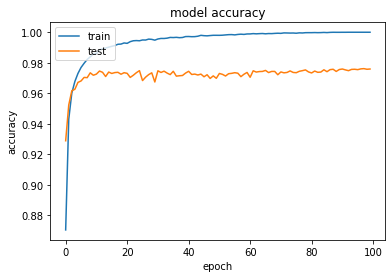

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

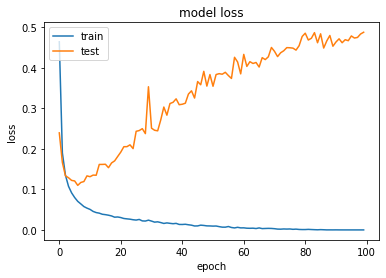

Epoch 1/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3309 - accuracy: 0.8979 - val_loss: 0.1664 - val_accuracy: 0.9503
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1377 - accuracy: 0.9588 - val_loss: 0.1335 - val_accuracy: 0.9592
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0977 - accuracy: 0.9707 - val_loss: 0.1061 - val_accuracy: 0.9679
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0738 - accuracy: 0.9776 - val_loss: 0.1040 - val_accuracy: 0.9679
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 0.0880 - val_accuracy: 0.9732
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0846 - val_accuracy: 0.9745
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.0833 - val_accuracy: 0.9758

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

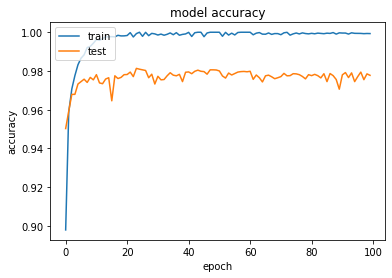

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

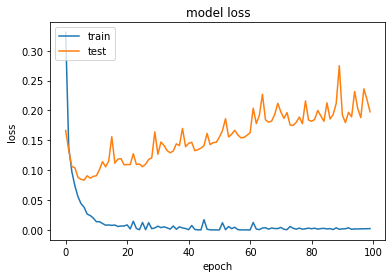

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 3780097536.0000 - accuracy: 0.1132 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3019 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accurac

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

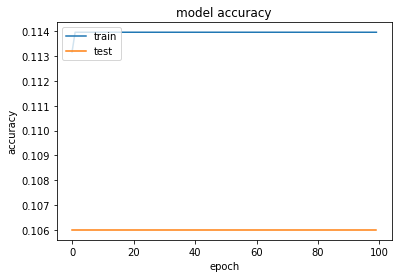

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

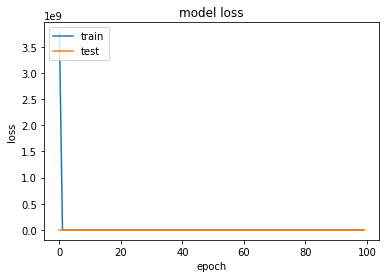

In [ ]:
# Train and test the models that use L2 Regularization in conjuction with the
# above models

alphas = [0.1, 0.01, 0.001]
for a in alphas:
  # Different Batch Sizes with L2
  for batch_size in [256, n_train]:
    model,history = build_model_default(X_train, Y_train, input_shape, num_of_classes,\
                    batch_size=batch_size, regularizer="l2",a=a)
    name = f"l2_{a}_batch_{batch_size}"
    plot_accuracy_loss(history, name)
  # RMSProp with L2
  for rho in rho_values:
    opt = tensorflow.keras.optimizers.RMSprop(learning_rate=lr, rho=rho)
    model,history = build_model_optimizer(X_train, Y_train, input_shape, num_of_classes,\
                      opt,  regularizer="l2",a=a)
    name = f"l2_{a}_rmsprop_rho_{rho}"
    plot_accuracy_loss(history, name)
  # SGD+Init with L2
  model,history = build_model_SGD(X_train, Y_train, input_shape, num_of_classes,\
                           regularizer="l2",a=a)
  name = f"l2_{a}_sgd"
  plot_accuracy_loss(history, name)

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 0.5203 - accuracy: 0.8415 - val_loss: 0.2117 - val_accuracy: 0.9362
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 0.2397 - accuracy: 0.9297 - val_loss: 0.1551 - val_accuracy: 0.9531
Epoch 3/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1831 - accuracy: 0.9447 - val_loss: 0.1206 - val_accuracy: 0.9657
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1495 - accuracy: 0.9549 - val_loss: 0.1205 - val_accuracy: 0.9644
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1329 - accuracy: 0.9602 - val_loss: 0.1096 - val_accuracy: 0.9668
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1163 - accuracy: 0.9639 - val_loss: 0.0957 - val_accuracy: 0.9725
Epoch 7/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1059 - accuracy: 0.9680 - val_loss: 0.0952 - val_accuracy: 0.9717

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

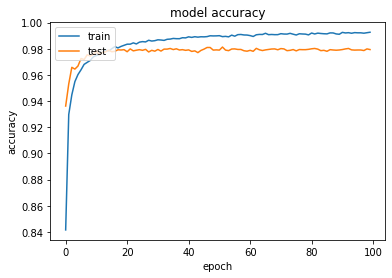

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

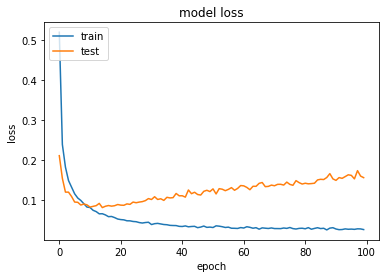

In [ ]:
# L1 Regularization + Dropout Model

reg = regularizers.L1(l1=0.01)
model,history = build_model_default(X_train, Y_train, input_shape, num_of_classes,\
                regularizer="l1",a=a, dropout=True)
name = "l1_dropout"
plot_accuracy_loss(history, name)